Importing needed libraries for data analysis

In [2]:
import pandas as pd             # for creating dataframe, data manipulation and visualization
import matplotlib.pyplot as plt # for creating visualizations
import seaborn as sns           # for creating visualizations
import os                       # for changing file path/ directory
import warnings

warnings.filterwarnings('ignore')

In [12]:
#load the dataset

df = pd.read_csv(r"/train.csv")

df.sample()                    # inpect our imported data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
820,821,1,1,"Hays, Mrs. Charles Melville (Clara Jennings Gr...",female,52.0,1,1,12749,93.5,B69,S


In [13]:
# checking for null values

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Displaying basic statistics

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Data Exploration:

We will explore the data to know answer some question such as;
How many passengers surived the disaster ?
How many passengers where in the different passenger cabin categories
Average age of passengers etc..

In [32]:
# Who surived the disaster. 1 indicates those who lived.........

survived_data = df.groupby('Survived')['PassengerId'].count()

died = survived_data[0]
survived = survived_data[1]
survival_rate = (survived/(died + survived))*100

print(f"{survived} passengers survived which puts the survival rate at {survival_rate:.1f}%")

342 passengers survived which puts the survival rate at 38.4%


In [ ]:
# Average age of passengers?

avg_age = df.Age.mean()
print(f'average age of passengers is {avg_age:.0f} years')

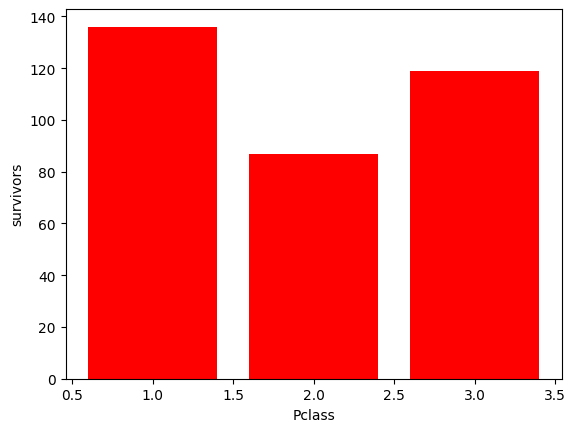

In [51]:
# How many passengers travelled in each Pclass?

pclass_passenger_count = df.groupby('Pclass')['Survived'].sum()
pclass_passenger_count

# Let's visualize this using a bar chart
x = pclass_passenger_count.index
y = pclass_passenger_count.values

plt.bar(x,y, color = 'red')
plt.xlabel('Pclass')
plt.ylabel('survivors')
plt.show()

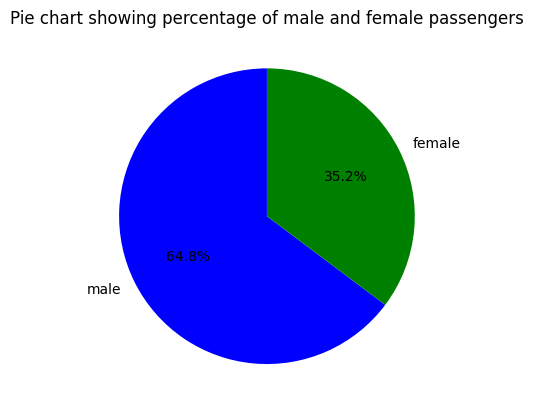

In [53]:
# Pie chart showing percentage of male and female passengers

male = df[df['Sex']=='male']
female = df[df['Sex']=='female']

plt.pie([len(male), len(female)],
       labels = ['male','female'],
       colors = ['b','g'],
       startangle = 90,
       shadow = False,
        explode = (0,0),
       autopct = '%1.1f%%')

plt.title('Pie chart showing percentage of male and female passengers')

plt.show()

In [54]:
# Oldest survivor

survivors = df[df['Survived']==1]
survivors_sorted = survivors.sort_values(by='Age', ascending=False)

person = survivors_sorted.iloc[0]
print(f"The oldest person to survive was an {person['Age']} years old {person['Sex']} who paid ${person['Fare']} at {person['Embarked']} Station")

The oldest person to survive was an 80.0 years old male who paid $30.0 at S Station


Now that we have explored the dataset and gained some insights, we will use Logistic Regression algorithm to train our dataset so that we can predict who survives next time


In [68]:
# Firstly, we will drop null values

data = df.dropna()

# Secondly, we will encode the category variables for needed columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['sex_en'] = le.fit_transform(data['Sex'])

# Thirdly, we will pick our dependent and independent variables

y = data.Survived                                            #dependent(target) variable
x = data[['sex_en','Pclass','Age','SibSp','Parch','Fare']]   #independent variable

# Lastly, we will perform feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x)

In [71]:
#Now we will train our dataset using logistic regression

from sklearn.linear_model import LogisticRegression

lre = LogisticRegression()
lre.fit(x_train,y)
lre.score(x_train,y)

0.7759562841530054

We have trained our algorithm to detect who will survive.
Now we will import a test data set to predict who will survive ?

In [73]:
data = pd.read_csv(r'/test.csv')
data.isna().sum()

test_data = data.fillna(0)
test_data['sex_en'] = le.fit_transform(test_data['Sex'])

x = test_data[['sex_en','Pclass','Age','SibSp','Parch','Fare']]

test_data['Survived'] = lre.predict(x)                          #N Prediction of test dataset using the trained logistic regression algorithm

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_en,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S,0,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S,1,0
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S,1,1


In [74]:
test_data.to_csv(r'/predicted_data.csv')